# FIN 514 - PS3 Q2 CRR
**Spring 2023**

This notebook provides the graphs for PS3 Q1 for the CRR model

## Packages and Configurations

The following common packages will be use on this notebook.

* numpy - [https://numpy.org/](https://numpy.org/)
* Pandas - [https://pandas.pydata.org/](https://pandas.pydata.org/)
* matplotlib - [https://matplotlib.org/](https://matplotlib.org/)
* Scipy Statistical functions - [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# ENTER INPUT FOR: start_step

start_step = 50

In [3]:
# ENTER INPUT FOR: N = num_steps

N = 1000

In [4]:
# ENTER INPUT FOR: S0 = Original Stock Price

S0 = 100.0

In [5]:
# ENTER INPUT FOR: K = Excercise Price of Call Option

K = 105

In [6]:
# ENTER INPUT FOR: sigma = Annualized (Future) Volatility of Stock Price Returns

sigma = 0.3

In [7]:
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate

r = 0.04

In [8]:
# ENTER INPUT FOR: T = Time Length of Option in which to Exercise (In Years)

T = 0.5

In [9]:
# ENTER INPUT FOR: q = Rate of continuous dividend paying asset 

q = 0

In [10]:
# ENTER INPUT FOR: whether option is call (1) or put (0)
cp = 0

## Black-Sholes Model 

In [11]:
def black_scholes(S0, K, T, r, q, sigma, cp):
    """
    Function to calculates the value of a European Call Option using Black Scholes 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    q: Rate of continuous dividend paying asset 
    sigma: Annualized (Future) Volatility of Stock Price Returns
    
    """
    
    cdf_mean = 0.0
    cdf_sd = 1.0
    
    d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if cp == 1:
        value = S0 * np.exp(-q * T) * st.norm.cdf(d1, cdf_mean, cdf_sd) 
        value = value - K * np.exp(-r * T) * st.norm.cdf(d2, cdf_mean, cdf_sd) 
    else:
        value = -S0 * np.exp(-q * T) * st.norm.cdf(-d1, cdf_mean, cdf_sd) 
        value = value + K * np.exp(-r * T) * st.norm.cdf(-d2, cdf_mean, cdf_sd) 
    
    return value

## Binomial Model Function

In [12]:

def CRRE_model(S0, K, T, r, sigma, start_step, N):
    """
    Function to calculates the value of a European Put Option using the CRR Binomial Model 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    sigma: Annualized (Future) Volatility of Stock Price Returns
    start_step: Starting time step
    N: Number of time steps
    
    """    
    
    # LIST TO SAVE RESULTS
    crre_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    
    option_value = np.zeros([N+1, N+1])
    stock_value = np.zeros([N+1, N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n in range(start_step, N+1):
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = 1 / u
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:

        j = n 
        
        for i in range(0, j):    
    # Then, calculate the value of the option at that exact position within the binomial tree

            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(K - stock_value[j, i], 0)

        for j in range(n-1, -1, -1):
             for i in range(j, -1, -1):          
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                option_value[j, i] = pv
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'CRR': option_value[0,0]}
        crre_result.append(output)

    return crre_result


In [13]:
crr = CRRE_model(S0, K, T, r, sigma, start_step, N)
crr

[{'num_steps': 50, 'CRR': 10.116927660843814},
 {'num_steps': 51, 'CRR': 10.13805931917227},
 {'num_steps': 52, 'CRR': 10.113249501075376},
 {'num_steps': 53, 'CRR': 10.138742954124089},
 {'num_steps': 54, 'CRR': 10.109746121525157},
 {'num_steps': 55, 'CRR': 10.139193186759396},
 {'num_steps': 56, 'CRR': 10.106404012944777},
 {'num_steps': 57, 'CRR': 10.139443950658816},
 {'num_steps': 58, 'CRR': 10.103211081226481},
 {'num_steps': 59, 'CRR': 10.13952381764477},
 {'num_steps': 60, 'CRR': 10.100156463633802},
 {'num_steps': 61, 'CRR': 10.139456959675757},
 {'num_steps': 62, 'CRR': 10.097230373074968},
 {'num_steps': 63, 'CRR': 10.139263916359502},
 {'num_steps': 64, 'CRR': 10.094423965563324},
 {'num_steps': 65, 'CRR': 10.138962211717145},
 {'num_steps': 66, 'CRR': 10.091729226952213},
 {'num_steps': 67, 'CRR': 10.138566853087246},
 {'num_steps': 68, 'CRR': 10.089138875752644},
 {'num_steps': 69, 'CRR': 10.138090737212028},
 {'num_steps': 70, 'CRR': 10.086646279419261},
 {'num_steps': 

In [14]:
bsc_value = black_scholes(S0, K, T, r, q, sigma,cp)
bsc_value

10.109303344957468

In [15]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(crr)
df

,num_steps,CRR
0,50,10.116928
1,51,10.138059
2,52,10.113250
3,53,10.138743
4,54,10.109746
...,...,...
946,996,10.111051
947,997,10.109017
948,998,10.111031
949,999,10.109063


In [16]:
# CALCULATE THE ERROR FROM BINOMIAL MODEL COMPARED WITH BLACK-SHCOLES
df['error_CRR'] = df["CRR"] - bsc_value 

In [17]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,num_steps,CRR,error_CRR
0,50,10.116928,0.007624
1,51,10.138059,0.028756
2,52,10.113250,0.003946
3,53,10.138743,0.029440
4,54,10.109746,0.000443


In [18]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,num_steps,CRR,error_CRR
946,996,10.111051,0.001747
947,997,10.109017,-0.000287
948,998,10.111031,0.001728
949,999,10.109063,-0.000241
950,1000,10.111011,0.001708


In [23]:
# EXPORT THE DATA TO A CSV FILE
df.to_csv("Q1crre.csv", index=False)

### Binomial Model Error Rate

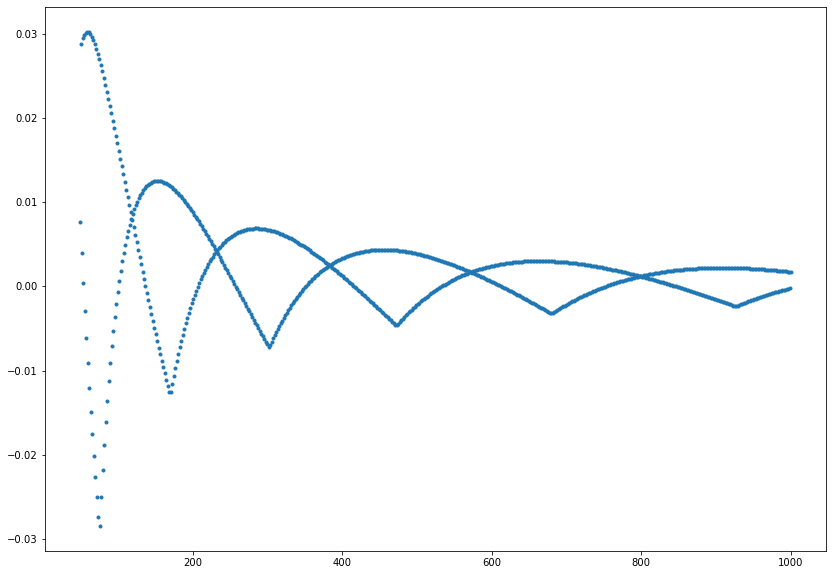

In [24]:
plt.figure(figsize=(14,10))
plt.plot(df['num_steps'], df['error_CRR'], 'o', markersize=3)
plt.show()